In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import math
#from datetime import datetime
import pickle
from country_list import countries_for_language
countries_list = dict(countries_for_language('en'))

data_folder = './data/'

### Import data set on character: 

In [50]:
data1 = pd.read_csv(data_folder + 'character.metadata.tsv', sep='\t', header=None)

def format_attr(df):
     '''
     Create a new dataframe with all attributes
     formatted according to the character data set'
     :param dataframe: pandas.DataFrame
     :return: new dataframe
     '''
     formatted_df = pd.DataFrame()
     formatted_df['wikipedia_id'] = df[df.columns[0]].astype(int)
     formatted_df['freebase_movie_id'] = df[df.columns[1]].astype(str)
    
     formatted_df['date'] = df[df.columns[2]]
     formatted_df['date'] = pd.to_datetime(formatted_df['date'])
     formatted_df['date'] = pd.DatetimeIndex(formatted_df['date']).year
    
     formatted_df['character_name'] = df[df.columns[3]].astype(str)
     formatted_df['gender'] = df[df.columns[5]].astype(str)
     formatted_df['ethnicity'] = df[df.columns[7]].astype(str)
     formatted_df['name'] = df[df.columns[8]].astype(str, errors='ignore')
     formatted_df['age'] = df[df.columns[9]].astype(int, errors='ignore')
     formatted_df['freebase_actor_character_id'] = df[df.columns[10]].astype(str)
     formatted_df['freebase_actor_id'] = df[df.columns[12]].astype(str)
     formatted_df['freebase_character_id'] = df[df.columns[11]].astype(str)
        
     return formatted_df

data1 =  data1[data1[data1.columns[7]].notna()]
charac_data = format_attr(data1)

In [51]:
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb
27,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450627,23687925,/m/06zmdnc,1952,NaN,1930-08-28,M,1.790,/m/0xnvg,Ben Gazzara,21.0,/m/0j2fmbs,NaN,/m/0428bc
450631,30553937,/m/0g9ts5h,1998-03-07,Tracy,1967-03-16,F,1.746,/m/033tf_,Lauren Graham,30.0,/m/0gw3h6q,/m/0h1gk0m,/m/03c6v3
450643,12476867,/m/02w7zz8,2002,NaN,1980-06-24,F,1.720,/m/041rx,Liane Balaban,21.0,/m/03jpb_5,NaN,/m/02pn4z4
450644,12476867,/m/02w7zz8,2002,NaN,1946-07-02,M,1.740,/m/041rx,Ron Silver,55.0,/m/04hv69s,NaN,/m/03swmf


For our first data set, we will only keep the following features : 

`wikipedia_id` : Wikipedia movie ID \
`freebase_movie_id` :  Freebase movie ID \
`date` :  Movie release date \
`wikipedia_id` : Character name \
`gender` : Actor gender \
`ethnicity` : Actor ethnicity (Freebase ID) \
`name` : Actor name \
`freebase_character_id` : Freebase character ID \
`freebase_actor_id` : Freebase actor ID

In [52]:
population_per_ethnicity = charac_data['ethnicity'].value_counts()
ethnicity_array = charac_data['ethnicity'].unique()
print(len(charac_data)) #we only keep 100 000 samples
print(population_per_ethnicity)

106058
/m/0dryh9k    16351
/m/0x67       10159
/m/041rx      10121
/m/02w7gg      6165
/m/033tf_      3857
              ...  
/m/043_z22        1
/m/03x_fq7        1
/m/01hphz         1
/m/033fjj         1
/m/013y54         1
Name: ethnicity, Length: 479, dtype: int64


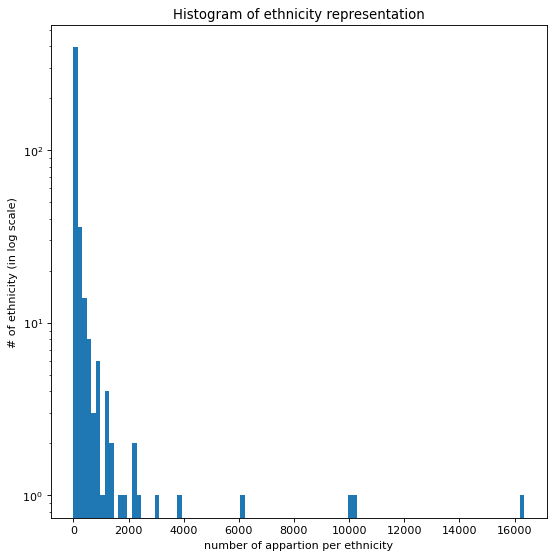

In [53]:
plt.figure(figsize=(8,8), dpi=80)

plt.hist(charac_data['ethnicity'].value_counts().values, bins=100, log = True)[-1]

plt.title('Histogram of ethnicity representation')
plt.ylabel('# of ethnicity (in log scale)')
plt.xlabel('number of appartion per ethnicity')
plt.show()

We can see that a fair proportion of ethnicity are poorly represented. A lot of ethnicity have only a few number of appartion.

In [54]:
#sort by datetime of movie and remove data after 2012
charac_data = charac_data.sort_values(by='date')
charac_data = charac_data[charac_data.date < 2013]
charac_data.head()

,wikipedia_id,freebase_movie_id,date,character_name,gender,ethnicity,name,age,freebase_actor_character_id,freebase_actor_id,freebase_character_id
72684,644824,/m/02_1qn,1891.0,nan,M,/m/03lmx1,William Dickson,NaN,/m/0jx879,/m/081ks,nan
342275,786716,/m/03c6bq,1894.0,nan,M,/m/03lmx1,William Dickson,NaN,/m/0lqhqw3,/m/081ks,nan
190378,12266752,/m/02vy7q4,1896.0,nan,M,/m/063k3h,William McKinley,NaN,/m/0mzm_t4,/m/083p7,nan
354987,15128774,/m/03hjd3w,1900.0,Prince Hamlet,F,/m/041rx,Sarah Bernhardt,NaN,/m/05x7bw_,/m/0c4qt,/m/0261d9m
221932,76026,/m/0k2vz,1901.0,nan,M,/m/063k3h,William McKinley,NaN,/m/0lml09m,/m/083p7,nan


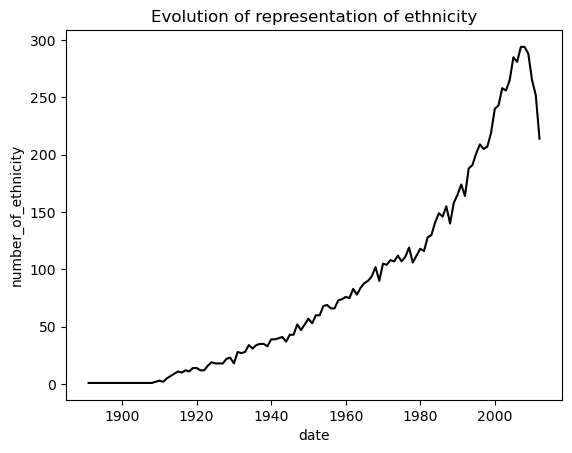

In [56]:
#plot of when ethnicity was finally starred in a movie

date_charac = charac_data.groupby(charac_data['date']).apply(lambda x: pd.Series({
        'num_of_ethnicity': x['ethnicity'].nunique(),
    }))

plt.plot(date_charac.index, date_charac.num_of_ethnicity, color = 'black')

plt.title('Evolution of representation of ethnicity')
plt.ylabel('number_of_ethnicity')
plt.xlabel('date')
plt.show()

We can see that there a clear evolution of representation of ethnicity over the years.

Let's look at the top 10 of actors with most apparition.

In [57]:
top_charac = charac_data.groupby(charac_data['name']).apply(lambda x: pd.Series({
        'ethnicity' : x['ethnicity'].unique()[0],
        'number_of_apparition': len(x['freebase_movie_id'])
    }))


top_charac = top_charac.sort_values(by='number_of_apparition',ascending=False)[top_charac.number_of_apparition > 50]

C:\Users\johan\AppData\Local\Temp\ipykernel_2560\613045343.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_charac = top_charac.sort_values(by='number_of_apparition',ascending=False)[top_charac.number_of_apparition > 50]


In [58]:
top_charac

,ethnicity,number_of_apparition
name,,
Mel Blanc,/m/041rx,648
Oliver Hardy,/m/07bch9,298
Mithun Chakraborty,/m/0bpjh3,297
Mohanlal,/m/0dryh9k,223
Mammootty,/m/04mvp8,210
...,...,...
Saif Ali Khan,/m/0bpjh3,51
Bruce Greenwood,/m/044038p,51
Suresh Oberoi,/m/0dryh9k,51


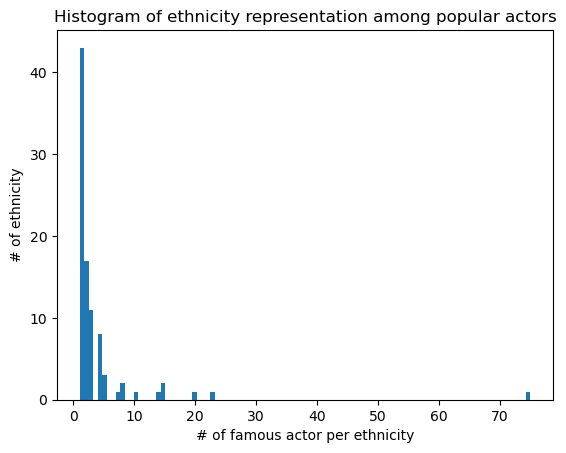

In [59]:
plt.hist(top_charac['ethnicity'].value_counts().values, bins=100)[-1]

plt.title('Histogram of ethnicity representation among popular actors')
plt.ylabel('# of ethnicity')
plt.xlabel('# of famous actor per ethnicity')
plt.show()

We can spot an outlier. There is an ethnicity with a huge number of popular actor. Some other ethnicity have a few popular actor. Can we really say that those ethnicity are well represented ? 

In [60]:
data2 = pd.read_csv(data_folder + 'movie.metadata.tsv', sep='\t', header=None)
def format_attr2(df):
     '''
     Create a new dataframe with all attributes
     formatted according to the character data set'
     :param dataframe: pandas.DataFrame
     :return: new dataframe
     '''
     formatted_df = pd.DataFrame()
     formatted_df['wikipedia_id'] = df[df.columns[0]].astype(int)
     formatted_df['movie_name'] = df[df.columns[2]].astype(str)    
     formatted_df['revenue'] = df[df.columns[4]].astype(int, errors='ignore')
     formatted_df['runtime'] = df[df.columns[5]].astype(int, errors='ignore')
     formatted_df['movie_languages'] = df[df.columns[6]].astype(str)
     formatted_df['movie_countries'] = df[df.columns[7]].astype(str)
     formatted_df['movie_genres'] = df[df.columns[8]].astype(str)
        
     return formatted_df


movie_data = format_attr2(data2)

In [61]:
movie_data.head(10)

,wikipedia_id,movie_name,revenue,runtime,movie_languages,movie_countries,movie_genres
0,975900,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,The Gangsters,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,The Sorcerer's Apprentice,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,Alexander's Ragtime Band,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,Contigo y aquí,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,City of the Dead,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [63]:
movie_data = movie_data[movie_data['wikipedia_id'].isin(charac_data['wikipedia_id'])]
merged_data = pd.merge(charac_data, movie_data, left_on='wikipedia_id', right_on='wikipedia_id', how = 'left')
merged_data

,wikipedia_id,freebase_movie_id,date,character_name,gender,ethnicity,name,age,freebase_actor_character_id,freebase_actor_id,freebase_character_id,movie_name,revenue,runtime,movie_languages,movie_countries,movie_genres
0,644824,/m/02_1qn,1891.0,nan,M,/m/03lmx1,William Dickson,NaN,/m/0jx879,/m/081ks,nan,Dickson Greeting,NaN,0.05,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/0219x_"": ""Indie""}"
1,786716,/m/03c6bq,1894.0,nan,M,/m/03lmx1,William Dickson,NaN,/m/0lqhqw3,/m/081ks,nan,Dickson Experimental Sound Film,NaN,0.00,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film""}"
2,12266752,/m/02vy7q4,1896.0,nan,M,/m/063k3h,William McKinley,NaN,/m/0mzm_t4,/m/083p7,nan,"McKinley at Home, Canton, Ohio",NaN,1.00,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
3,15128774,/m/03hjd3w,1900.0,Prince Hamlet,F,/m/041rx,Sarah Bernhardt,NaN,/m/05x7bw_,/m/0c4qt,/m/0261d9m,Hamlet,NaN,2.00,{},"{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/07s9rl0"": ""Dra..."
4,76026,/m/0k2vz,1901.0,nan,M,/m/063k3h,William McKinley,NaN,/m/0lml09m,/m/083p7,nan,President McKinley Inauguration Footage,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102367,30672494,/m/0g9xjv9,2012.0,nan,M,/m/0cqgdq,Rajnikanth,61.0,/m/0gw218j,/m/02wmbg,nan,Rana,NaN,NaN,"{""/m/03k50"": ""Hindi Language"", ""/m/09s02"": ""Te...","{""/m/03rk0"": ""India""}","{""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
102368,32985148,/m/0h533hm,2012.0,Raghu,M,/m/0dryh9k,Jiiva,27.0,/m/0h58g5n,/m/0j46lfy,/m/0h8mh95,Neethaane En Ponvasantham,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}",{},"{""/m/02l7c8"": ""Romance Film""}"
102369,23690065,/m/0gxz14q,2012.0,nan,F,/m/01rv7x,Anupama Kumar,37.0,/m/0hzw16b,/m/080kws4,nan,Mugamoodi,NaN,NaN,{},{},"{""/m/04pbhw"": ""Superhero movie""}"
102370,35997584,/m/0j_5r7f,2012.0,nan,M,/m/041rx,Eli Roth,40.0,/m/0mzm4dl,/m/058kqy,nan,Aftershock,NaN,90.00,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""}"


Here we get the data merged between character data and movie data.
From this data set, we want to see which country has the most diversity.

Let's try to clean the datas to get only the countries for this column.

In [64]:
df = merged_data.copy()

def list_in_str(List,Str):
    Str_split = Str.lower().split(" ")
    for entry in List:
        if entry.lower() in Str_split:
            return 1
    return 0

for co in countries_list:
    df[co] = [list_in_str(countries_list[co],Str) for Str in df['movie_countries']]

C:\Users\johan\AppData\Local\Temp\ipykernel_2560\2432243893.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[co] = [list_in_str(countries_list[co],Str) for Str in df['movie_countries']]
C:\Users\johan\AppData\Local\Temp\ipykernel_2560\2432243893.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[co] = [list_in_str(countries_list[co],Str) for Str in df['movie_countries']]
C:\Users\johan\AppData\Local\Temp\ipykernel_2560\2432243893.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

In [65]:
df

,wikipedia_id,freebase_movie_id,date,character_name,gender,ethnicity,name,age,freebase_actor_character_id,freebase_actor_id,...,UZ,VU,VA,VE,VN,WF,EH,YE,ZM,ZW
0,644824,/m/02_1qn,1891.0,nan,M,/m/03lmx1,William Dickson,NaN,/m/0jx879,/m/081ks,...,0,0,0,0,0,0,0,0,0,0
1,786716,/m/03c6bq,1894.0,nan,M,/m/03lmx1,William Dickson,NaN,/m/0lqhqw3,/m/081ks,...,0,0,0,0,0,0,0,0,0,0
2,12266752,/m/02vy7q4,1896.0,nan,M,/m/063k3h,William McKinley,NaN,/m/0mzm_t4,/m/083p7,...,0,0,0,0,0,0,0,0,0,0
3,15128774,/m/03hjd3w,1900.0,Prince Hamlet,F,/m/041rx,Sarah Bernhardt,NaN,/m/05x7bw_,/m/0c4qt,...,0,0,0,0,0,0,0,0,0,0
4,76026,/m/0k2vz,1901.0,nan,M,/m/063k3h,William McKinley,NaN,/m/0lml09m,/m/083p7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102367,30672494,/m/0g9xjv9,2012.0,nan,M,/m/0cqgdq,Rajnikanth,61.0,/m/0gw218j,/m/02wmbg,...,0,0,0,0,0,0,0,0,0,0
102368,32985148,/m/0h533hm,2012.0,Raghu,M,/m/0dryh9k,Jiiva,27.0,/m/0h58g5n,/m/0j46lfy,...,0,0,0,0,0,0,0,0,0,0
102369,23690065,/m/0gxz14q,2012.0,nan,F,/m/01rv7x,Anupama Kumar,37.0,/m/0hzw16b,/m/080kws4,...,0,0,0,0,0,0,0,0,0,0
102370,35997584,/m/0j_5r7f,2012.0,nan,M,/m/041rx,Eli Roth,40.0,/m/0mzm4dl,/m/058kqy,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_country = pd.DataFrame()
df_country['country'] = countries_list

coun = np.zeros(len(countries_list))
for eth in df['ethnicity'].unique():
    for i in range(len(countries_list)):
        if sum(df[df['ethnicity'] == 'eth'].iloc[:, i + 17]) > 0:
            coun[i] += 1
        


In [18]:
df_country['number_of_ethnicity'] = coun

In [19]:
df_country.sample(10)

,country,number_of_ethnicity
PG,PG,0.0
PK,PK,0.0
BS,BS,0.0
TF,TF,0.0
LB,LB,0.0
RU,RU,0.0
MN,MN,0.0
MY,MY,0.0
OM,OM,0.0
KY,KY,0.0


## Representation of Ethnic Diversity in Different Film Industries
### 1 What are the biggest ethnicities in our dataset?

In [223]:
fname = 'mapping.pickle'
mapping = pickle.load(open(fname,'rb'))

ethn_by_nActors = charac_data['ethnicity'].value_counts()

ethn = pd.DataFrame()
ethn['ID'] = ethn_by_nActors.keys()
ethn['# Actors'] = ethn_by_nActors.values
ethn['Ethnicity'] = ethn_by_nActors.keys().map(mapping)

For milestone 2, we focus on the 20 most frequent IDs in the dataset:

In [224]:
ethn.head(20)

,ID,# Actors,Ethnicity
0,/m/0dryh9k,15449,Indians
1,/m/0x67,9983,African Americans
2,/m/041rx,9813,Jewish people
3,/m/02w7gg,5996,English people
4,/m/033tf_,3801,Irish Americans
5,/m/0xnvg,2894,Italian Americans
6,/m/02ctzb,2247,white people
7,/m/07hwkr,2203,white Americans
8,/m/07bch9,2194,Scottish American
9,/m/044038p,1831,False


These can be clustered in the following ethnic groups:

In [225]:
asian = ['/m/0dryh9k','/m/01rv7x','/m/02sch9','/m/04mvp8']
black = ['/m/0x67']
mixed = []
white = ['/m/041rx','/m/02w7gg','/m/033tf_','/m/0xnvg','/m/02ctzb','/m/07hwkr','/m/07bch9','/m/03bkbh','/m/0d7wh','/m/03ts0c','/m/0222qb','/m/03lmx1','/m/065b6q','/m/01qhm_']
other = []
ethn_groups = {'Asian': asian, 'Black/Caribbean/African': black, 'Mixed': mixed, 'White': white, 'Other': other}

The classification was done according to https://www.ethnicity-facts-figures.service.gov.uk/style-guide/ethnic-groups.

### 2 How are ethnicities represented in the different film industries?

In [228]:
industries = {'US': 'United States of America', 'DE': 'Germany', 'FR': 'France', 'IN': 'India'}
shares = np.zeros((len(industries.keys()),len(ethn_groups.keys())))
US.value_counts()
i = -1
for country in industries:
    i += 1
    mask = [industries[country] in entry for entry in merged_data['movie_countries']]
    ethnicities_from_country = df.loc[mask]['ethnicity'].value_counts()
    j = -1
    for group in ethn_groups:
        j += 1
        count = 0
        for ethnicity in ethn_groups[group]:
            try:
                count += ethnicities_from_country[ethnicity]
            except:
                pass
        shares[i,j] = count

shares_rel = 100*shares/shares.sum(1)[:,None]

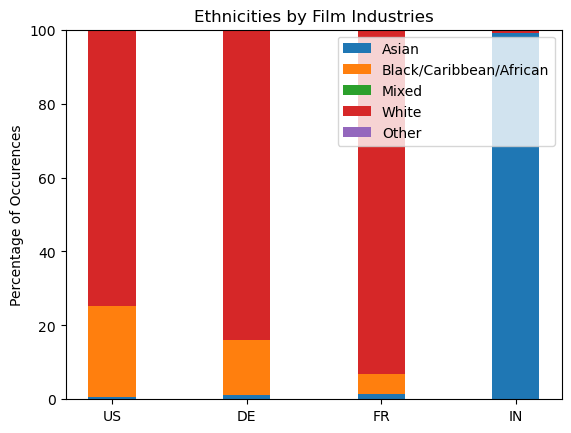

In [230]:
labels = industries.keys()
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
ethn_groups_list = list(ethn_groups.keys())
ax.bar(labels, shares_rel[:,0], width, label=ethn_groups_list[0])
bot = 0
for i in range(len(ethn_groups.keys())-1):
    bot += shares_rel[:,i]
    ax.bar(labels, shares_rel[:,i+1], width, bottom=bot, label=ethn_groups_list[i+1])

ax.set_ylabel('Percentage of Occurences')
ax.set_title('Ethnicities by Film Industries')
ax.legend()

plt.show()

## Ethnic diversity correlated with success 

To see if ethnic diversity is correlated with success, we have to find what makes an actor successfull, with our datas we considered two points. Firstly a successfull actor has made many movies. Secondly a successfull actor is often playing in big movies with good revenue. Obviously it's not always the case as some movie with good revenue were not expected to be successfull and so the actors were not really successful at the time. 

In [140]:
data_success = pd.DataFrame()
data_success = merged_data.groupby(merged_data['name']).apply(lambda x: pd.Series({
        'ethnicity' : x['ethnicity'].unique()[0],
        'number_movie': len(x['freebase_movie_id'])
    }))
average_number_movie = data_success.groupby (data_success['ethnicity']).apply(lambda x: pd.Series({
        'average_number_movie': sum(x['number_movie'])/len(x['ethnicity'])
    }))
average_number_actors = data_success.groupby (data_success['ethnicity']).apply(lambda x: pd.Series({
        'average_number_actors': len(x['ethnicity'])
    }))

average_number_actors

,average_number_actors
ethnicity,
/m/01267,2
/m/012c1l,7
/m/012f86,7
/m/012fh,1
/m/01336l,30
...,...
/m/0j4w_,2
/m/0j6x8,17
/m/0x67,1466


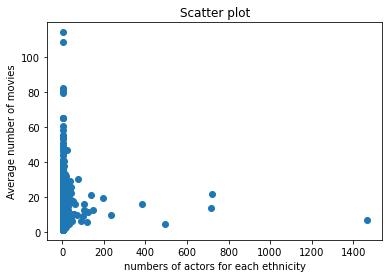

In [139]:
plt.scatter(average_number_actors, average_number_movie, cmap= 'viridis', label = data_success['ethnicity'] )
plt.title('Scatter plot')
plt.ylabel('Average number of movies')
plt.xlabel('Numbers of actors for each ethnicity')
plt.show()

### Revenu

We want to see if there is correlation between the ethnicity of the actor and the revenu of the movie; as explained in the first part we hypothesed that a successfull movie will probably recrute successfull actors. 

In [160]:
data_revenu = pd.DataFrame()

#removing all row with no value for the revenue

df= merged_data.dropna(subset=['revenue'])

data_revenu = df.groupby(df['ethnicity']).apply(lambda x: pd.Series({
        'average_revenu': sum (x['revenue'])/len(x['freebase_movie_id'])
    }))


In [161]:
data_revenu

,average_revenu
ethnicity,
/m/01267,4.292656e+08
/m/012c1l,6.965630e+07
/m/012f86,6.256289e+07
/m/01336l,7.233010e+07
/m/013b6_,1.330471e+08
...,...
/m/0hj35,2.987730e+07
/m/0j4w_,1.072811e+08
/m/0j6x8,1.733930e+08


<AxesSubplot:xlabel='ethnicity'>

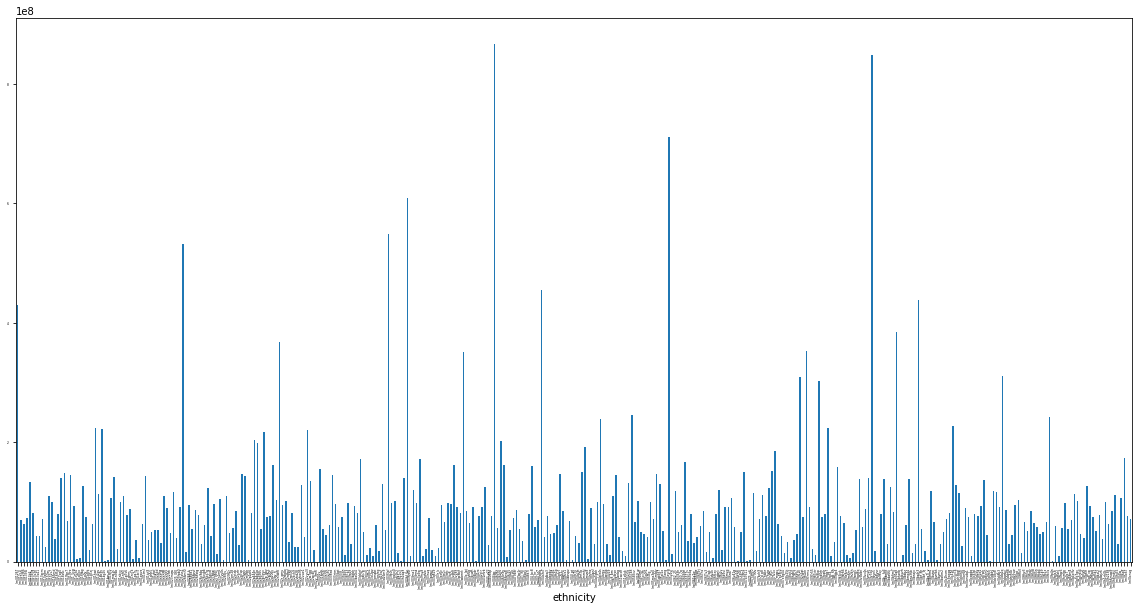

In [178]:
data_revenu['average_revenu'].plot(kind='bar',figsize=(20, 10), fontsize=3)